In [14]:
import pandas as pd 
train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
print(train.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [15]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [16]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [17]:
print(train.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  \
0        81        0.0       3          13     16  2011      1    1     0   
1        80        0.0       8          32     40  2011      1    1     1   
2        80        0.0       5          27     32  2011      1    1     2   
3        75        0.0       3          10     13  2011      1    1     3   
4        75        0.0       0           1      1  2011      1    1     4   

   minute  second  
0       0       0  
1       0       0  
2       0     

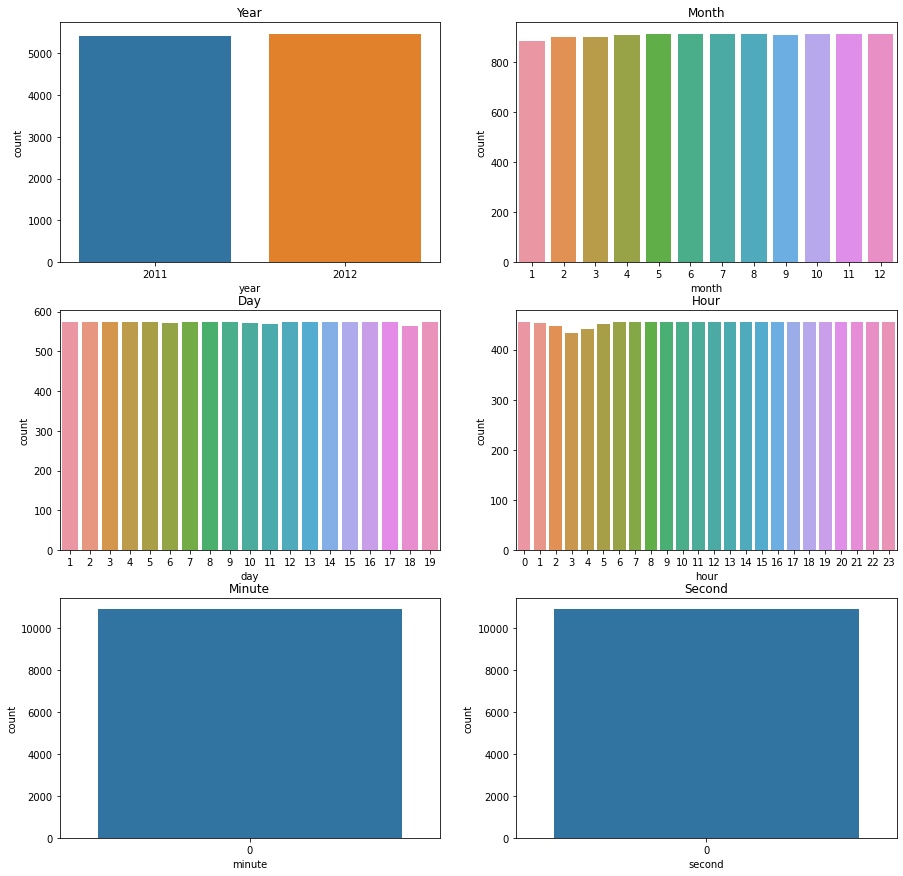

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.countplot(x='year', data=train, ax=axs[0,0])
sns.countplot(x='month', data=train, ax=axs[0,1])
sns.countplot(x='day', data=train, ax=axs[1,0])
sns.countplot(x='hour', data=train, ax=axs[1,1])
sns.countplot(x='minute', data=train, ax=axs[2,0])
sns.countplot(x='second', data=train, ax=axs[2,1])

axs[0,0].set_title('Year')
axs[0,1].set_title('Month')
axs[1,0].set_title('Day')
axs[1,1].set_title('Hour')
axs[2,0].set_title('Minute')
axs[2,1].set_title('Second')

plt.show()


In [28]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp','humidity', 
            'windspeed', 'year', 'month', 'day', 'hour']
X = train[features]
y = train['count']

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse, rmse)



18854.7431478405 137.31257461660422


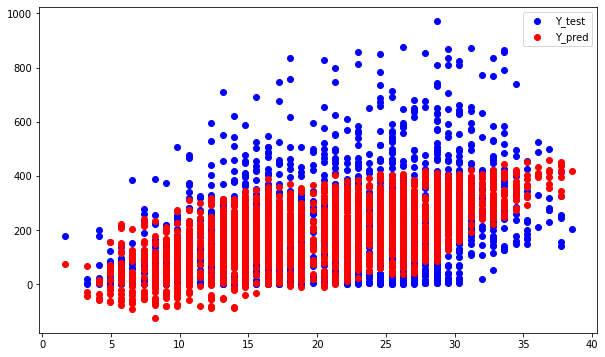

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['temp'], y_test, label = 'Y_test', color ='b')
plt.scatter(X_test['temp'], y_pred, label = 'Y_pred', color = 'r')
plt.legend()
plt.show()

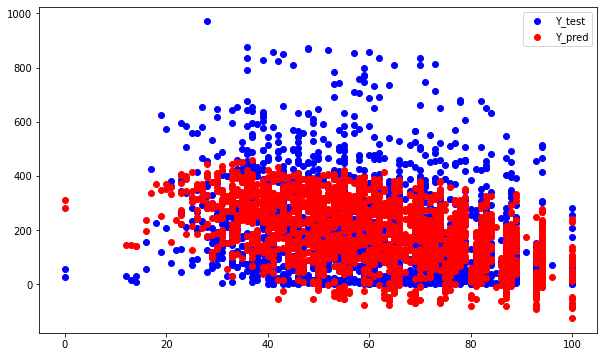

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['humidity'], y_test, label = 'Y_test', color ='b')
plt.scatter(X_test['humidity'], y_pred, label = 'Y_pred', color = 'r')
plt.legend()
plt.show()

1. Python 문법이 이해에 지장 없을 정도로만 빠르게 훑고 갔던 지라, 정말 많이 약한 거 같다.
2. matplotlib 는 seaborn이랑 같이 정말 많이 쓰이는데, 라이브러리 이해도가 낮은 것 같아서, 
더 찾아보고 다음 프로젝트 할 땐 여러 graph를 다양한 옵션으로 그려보는 게 좋겠다.
3. 조건문, if while for 등이나 파이썬 자료 형태에 대해서 한번 더 정리해야겠다.